In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('C:\\Users\\zaini\\Downloads\\archive\\all-weeks-global.csv',encoding='latin1')

In [4]:
df.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2024-01-07,Films (English),1,The Equalizer 3,NaN,26800000,1.8167,14800000.0,1,False,NaN
1,2024-01-07,Films (English),2,Rebel Moon ? Part One: A Child of Fire,NaN,25100000,2.2667,11100000.0,3,False,NaN
2,2024-01-07,Films (English),3,Leave the World Behind,NaN,18700000,2.3667,7900000.0,5,False,NaN
3,2024-01-07,Films (English),4,Exodus: Gods and Kings,NaN,18600000,2.5000,7400000.0,1,False,NaN
4,2024-01-07,Films (English),5,Aquaman,NaN,16800000,2.3833,7000000.0,1,False,NaN


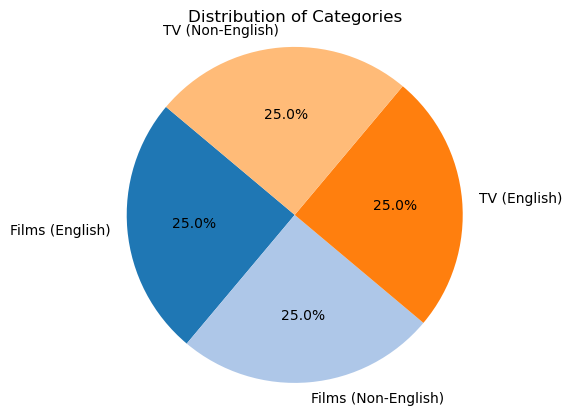

In [5]:
categories = df.iloc[:, 1].unique()

category_counts = df.iloc[:, 1].value_counts()

labels = categories
sizes = [category_counts[category] for category in categories]
colors = plt.cm.tab20.colors  

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Categories')

plt.show()


In [6]:
value_counts = df.iloc[:, 1].value_counts()
for value, count in value_counts.items():
    print(f"{value}: {count}")

Films (English): 1320
Films (Non-English): 1320
TV (English): 1320
TV (Non-English): 1320


In [7]:
top_20_most_viewed = df[['show_title', 'weekly_hours_viewed']].sort_values(by='weekly_hours_viewed', ascending=False).head(20)
print(top_20_most_viewed)

              show_title  weekly_hours_viewed
4750          Squid Game            571760000
4790          Squid Game            448730000
4710          Squid Game            412940000
2300           Wednesday            411290000
2340           Wednesday            341230000
3340     Stranger Things            335010000
3180     Stranger Things            301280000
2660              DAHMER            299840000
3380     Stranger Things            286790000
2260           Wednesday            269670000
4670          Squid Game            258840000
3700          Bridgerton            251740000
20          Fool Me Once            238200000
4030  All of Us Are Dead            236230000
1620     The Night Agent            216390000
2620              DAHMER            205330000
4910         Money Heist            201910000
2700              DAHMER            196200000
3940      Inventing Anna            195970000
3740          Bridgerton            193020000


In [8]:
combined_viewed_hours = df.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()

top_20_most_viewed_combined = combined_viewed_hours.sort_values(by='weekly_hours_viewed', ascending=False).head(20)

print(top_20_most_viewed_combined)


                   show_title  weekly_hours_viewed
1227          Stranger Things           2967980000
1220               Squid Game           2315500000
1658                Wednesday           1806850000
848                  Manifest           1320520000
1706                      You           1245390000
895               Money Heist           1185400000
1519              The Witcher           1117900000
215                Bridgerton           1040310000
998               Outer Banks            964410000
319                    DAHMER            962470000
1643             Virgin River            912210000
1144            Sex Education            901760000
235   Caf? con aroma de mujer            813480000
520           Ginny & Georgia            788880000
800             Love Is Blind            779300000
1426          The Night Agent            776620000
1003                    Ozark            751600000
417            Emily in Paris            684200000
1317                The Crown  

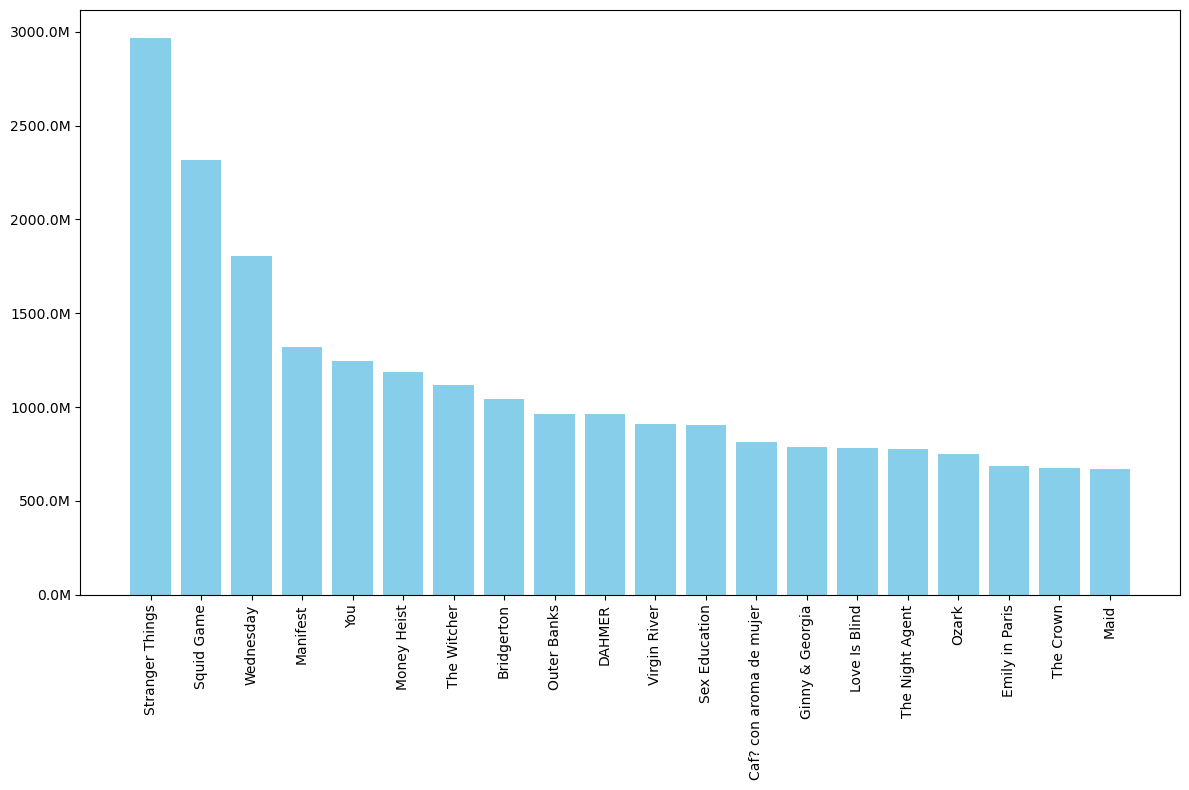

In [9]:
import matplotlib.ticker as ticker

combined_viewed_hours = df.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()

top_20_most_viewed_combined = combined_viewed_hours.sort_values(by='weekly_hours_viewed', ascending=False).head(20)

plt.figure(figsize=(12, 8))
bars = plt.bar(top_20_most_viewed_combined['show_title'], top_20_most_viewed_combined['weekly_hours_viewed'], color='skyblue')
plt.xticks(rotation=90) 

formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1_000_000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

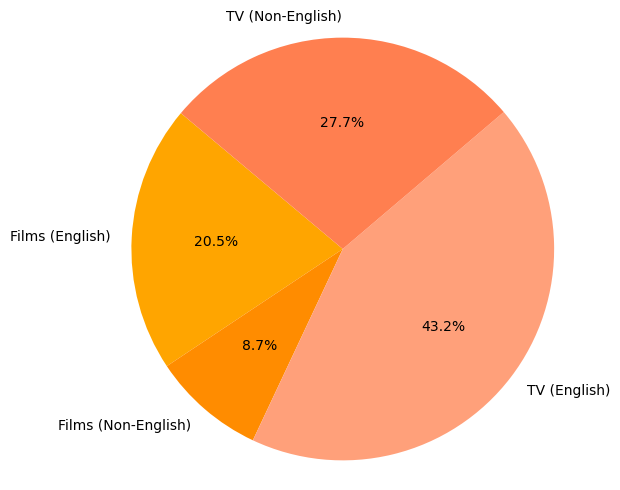

In [10]:
category_viewed_hours = df.groupby('category')['weekly_hours_viewed'].sum().reset_index()

colors = ['#FFA500', '#FF8C00', '#FFA07A', '#FF7F50', '#FF6347']  

plt.figure(figsize=(6, 6))
plt.pie(category_viewed_hours['weekly_hours_viewed'], labels=category_viewed_hours['category'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal') 

plt.show()

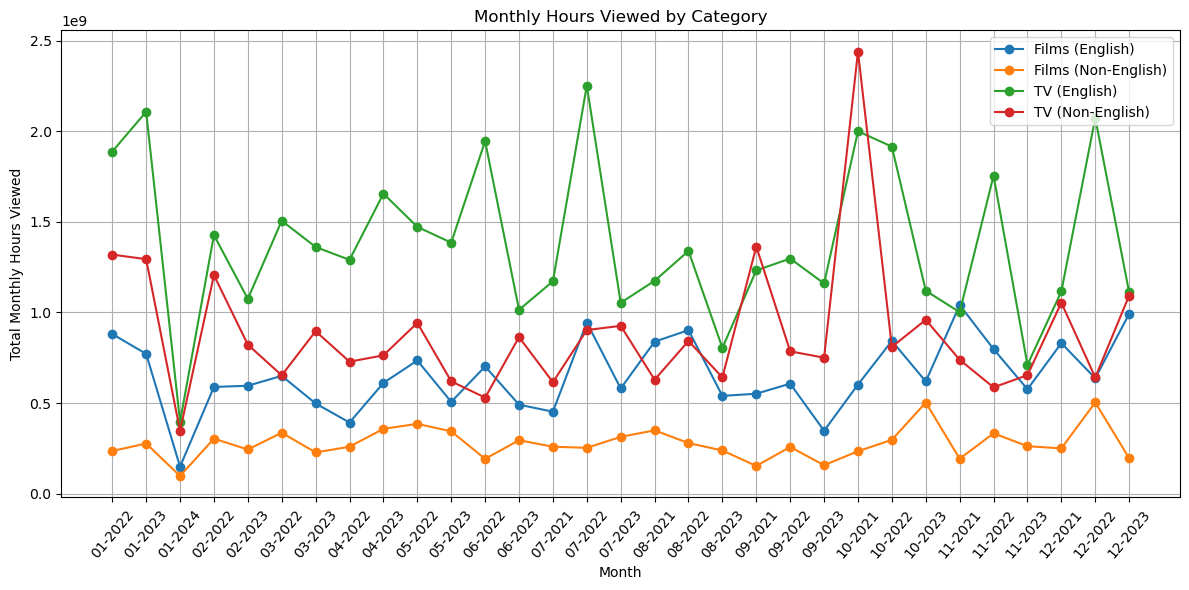

In [15]:
df['month'] = pd.to_datetime(df['week']).dt.strftime('%m-%Y')

monthly_category_viewed_hours = df.groupby(['month', 'category'])['weekly_hours_viewed'].sum().reset_index()

plt.figure(figsize=(12, 6))
for category, group_data in monthly_category_viewed_hours.groupby('category'):
    plt.plot(group_data['month'], group_data['weekly_hours_viewed'], marker='o', label=category)

plt.title('Monthly Hours Viewed by Category')
plt.xlabel('Month')
plt.ylabel('Total Monthly Hours Viewed')
plt.xticks(rotation=50)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

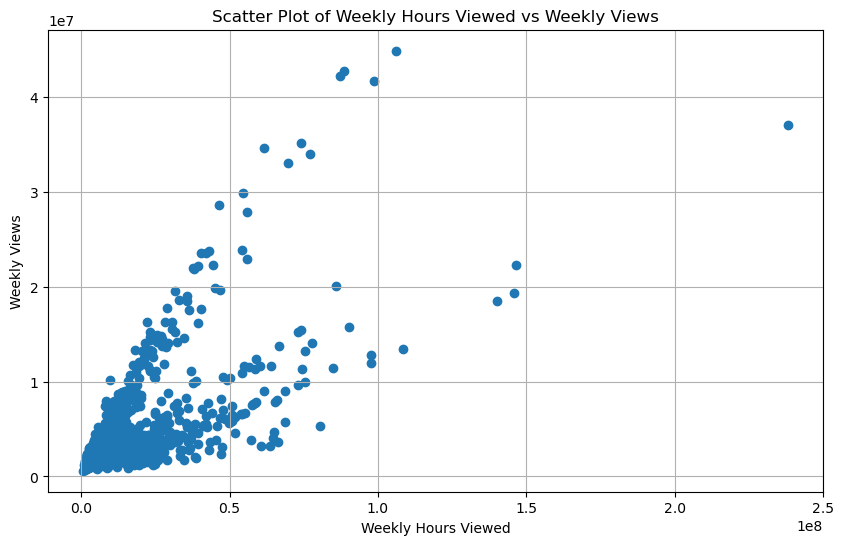

In [12]:
# Assuming 'weekly_hours_viewed' as x-axis and 'weekly_views' as y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['weekly_hours_viewed'], df['weekly_views'])
plt.title('Scatter Plot of Weekly Hours Viewed vs Weekly Views')
plt.xlabel('Weekly Hours Viewed')
plt.ylabel('Weekly Views')
plt.grid(True)
plt.show()

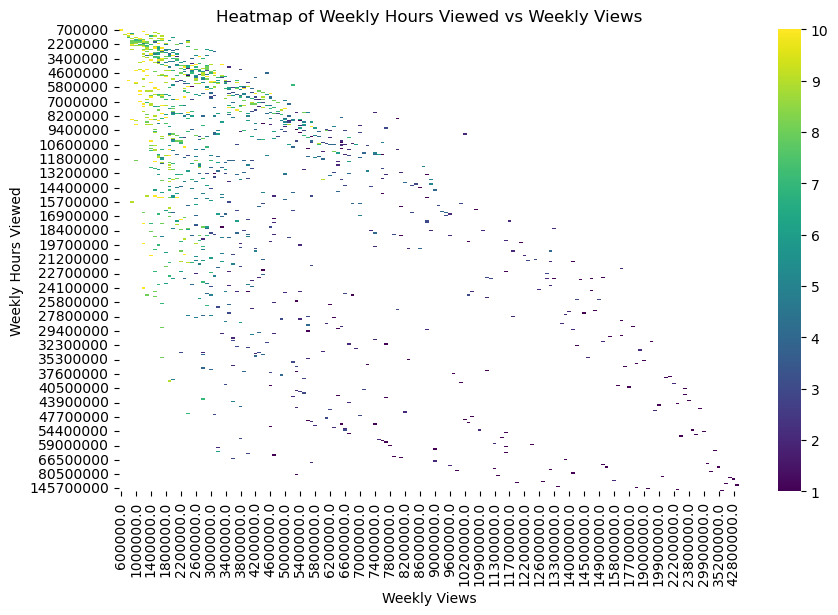

In [14]:
# Assuming 'weekly_hours_viewed' as x-axis and 'weekly_views' as y-axis
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='weekly_hours_viewed', columns='weekly_views', values='weekly_rank')
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Weekly Hours Viewed vs Weekly Views')
plt.xlabel('Weekly Views')
plt.ylabel('Weekly Hours Viewed')
plt.show()